# Tensorflow

In [2]:
import numpy as np
import tensorflow as tf

In [25]:
tf.contrib.keras.layers.Wrapper

tensorflow.contrib.keras.python.keras.layers.wrappers.Wrapper

https://www.tensorflow.org/programmers_guide

<img src="tensors_flowing.gif"/>

## Пример: линейная регрессия

In [3]:
# подбираем коэффициенты квадратного уравнения: y = w1 * x^2 + w2 * x + w3

### Входные переменные и параметры модели

In [3]:
# tf.placeholder позволяет передавать данные из python в Tensorflow
# с помощью tf.placeholder мы передаем данные для обуения
x = tf.placeholder(tf.float32, shape=[None], name='x')
y = tf.placeholder(tf.float32, shape=[None], name='y')

In [12]:
# инициализируем переменную w
# повторная инициализация приводит к ошибке ??

with tf.variable_scope('myscope', reuse=True) as scope:
    w = tf.get_variable('w', shape=[3, 1],
           initializer=tf.constant_initializer([3, 3, 3]))

In [13]:
w.name

'myscope/w:0'

### Модель и функция потерь

In [15]:
# задаем модель с помощю операций
f = tf.stack([tf.square(x), x, tf.ones_like(x)], 1)
yhat = tf.squeeze(tf.matmul(f, w), 1)

In [16]:
# задаем квадратичную функцию потерь
loss = tf.nn.l2_loss(yhat - y) + 0.1 * tf.nn.l2_loss(w)

In [17]:
# инициализируем оптимизатор для подбора параметров модели
train_op = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

### Обучение

In [19]:
# генератор данных
def generate_data(batch_size=100):
    x_val = np.random.uniform(-10.0, 10.0, size=batch_size)
    y_val = 5 * np.square(x_val) + 3 + np.random.normal()
    return x_val, y_val

In [21]:
loss_vals = []

# инициализируем сессию
with tf.Session() as sess:
    # инициализируем переменные (параметры модели)
    sess.run(tf.global_variables_initializer())
    # запускаем обучение
    for i in range(100):
        # генерируем случайный набор данных
        x_val, y_val = generate_data(batch_size=100)
        # выполняем операции на заланном семпле
        _, loss_val = sess.run([train_op, loss],
                               {x: x_val, y: y_val})
        loss_vals.append(loss_val)
        if i % 10 == 0:
            print('%03d\t%s' % (i, loss_val))
    print('weights: %s' % sess.run([w])) # выводим веса

000	463011.0
010	92006.1
020	11645.2
030	3159.95
040	5624.95
050	1390.37
060	296.53
070	253.016
080	92.176
090	19.4112
weights: [array([[ 4.97696018],
       [ 0.01035474],
       [ 4.73525286]], dtype=float32)]


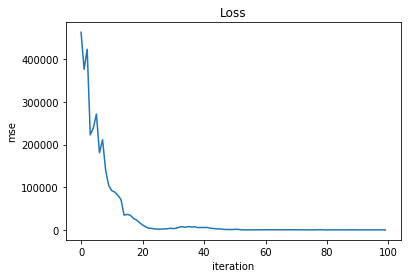

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(loss_vals)
plt.title('Loss')
plt.xlabel('iteration')
plt.ylabel('mse')

## Визуализация графа

In [23]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('log/001', sess.graph)
    writer.close()

In [ ]:
!ls ./log/001/events.out.tfevents.1511464295.vmurashkin-osx2.local